<a href="https://colab.research.google.com/github/chetansy08/iml/blob/main/Copy_of_IML_23_01_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

6) Expectaion maximization

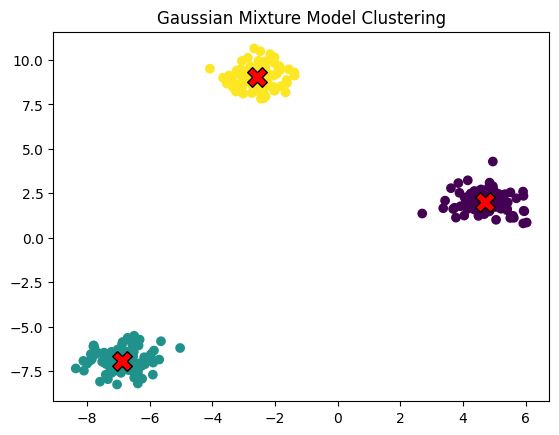

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs

# Generate synthetic data with three clusters
X, y = make_blobs(n_samples=300, centers=3, random_state=42, cluster_std=0.60)

# Fit a Gaussian Mixture Model (GMM) using Expectation-Maximization
gmm = GaussianMixture(n_components=3, random_state=42)
gmm.fit(X)

# Predict the cluster labels
labels = gmm.predict(X)

# Plot the data and cluster centers
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(gmm.means_[:, 0], gmm.means_[:, 1], s=200, marker='X', c='red', edgecolors='black')
plt.title('Gaussian Mixture Model Clustering')
plt.show()


7) 	Naive bayes classifier

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Gaussian Naive Bayes classifier
naive_bayes_classifier = GaussianNB()

# Train the classifier on the training data
naive_bayes_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = naive_bayes_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Display classification report
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



8) k means

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


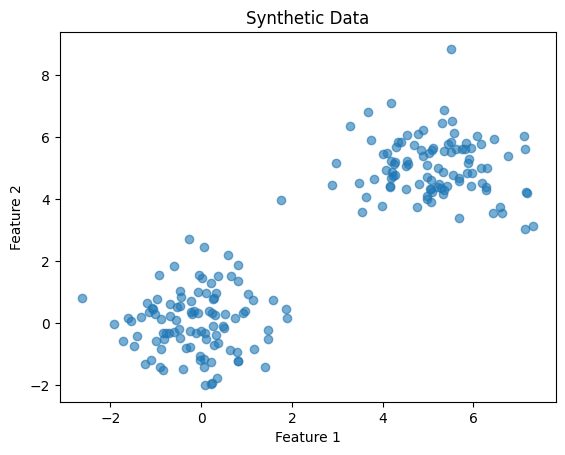

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


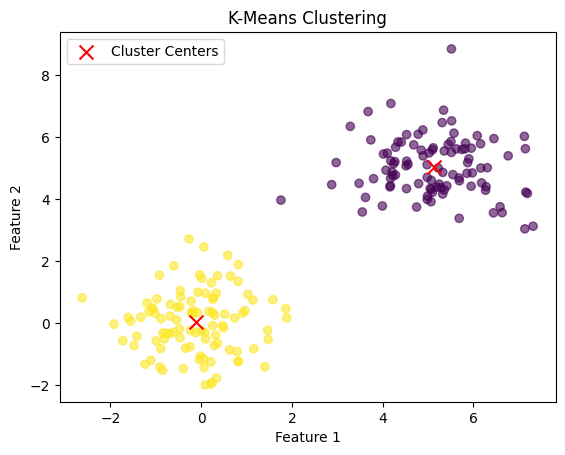

In [ ]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Generate synthetic data
np.random.seed(42)
X1 = np.random.normal(loc=0, scale=1, size=(100, 2))
X2 = np.random.normal(loc=5, scale=1, size=(100, 2))
X = np.concatenate([X1, X2])

# Visualize the data
plt.scatter(X[:, 0], X[:, 1], alpha=0.6)
plt.title("Synthetic Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Initialize KMeans with K=2
kmeans = KMeans(n_clusters=2, random_state=42)

# Fit the model to the data
kmeans.fit(X)

# Extract cluster centers and labels
centers = kmeans.cluster_centers_
labels = kmeans.labels_

# Visualize the clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', alpha=0.6)
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x', s=100, label='Cluster Centers')
plt.title("K-Means Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


9) 	Apriori

In [ ]:
from mlxtend.frequent_patterns import apriori
from mlxtend.preprocessing import TransactionEncoder
import pandas as pd

# Example transaction data
transactions = [
    ['bread', 'milk', 'eggs'],
    ['bread', 'butter', 'cheese'],
    ['milk', 'butter', 'bread', 'cheese'],
    ['eggs', 'bread', 'milk'],
    ['butter', 'milk', 'bread']
]

# Convert the transaction data to a one-hot encoded DataFrame
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

# Apply Apriori algorithm
frequent_itemsets = apriori(df, min_support=0.4, use_colnames=True)

# Display the frequent itemsets
print("Frequent Itemsets:\n", frequent_itemsets)


Frequent Itemsets:
     support                 itemsets
0       1.0                  (bread)
1       0.6                 (butter)
2       0.4                 (cheese)
3       0.4                   (eggs)
4       0.8                   (milk)
5       0.6          (bread, butter)
6       0.4          (bread, cheese)
7       0.4            (bread, eggs)
8       0.8            (bread, milk)
9       0.4         (cheese, butter)
10      0.4           (milk, butter)
11      0.4             (milk, eggs)
12      0.4  (bread, cheese, butter)
13      0.4    (bread, butter, milk)
14      0.4      (bread, eggs, milk)


10) PCA

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


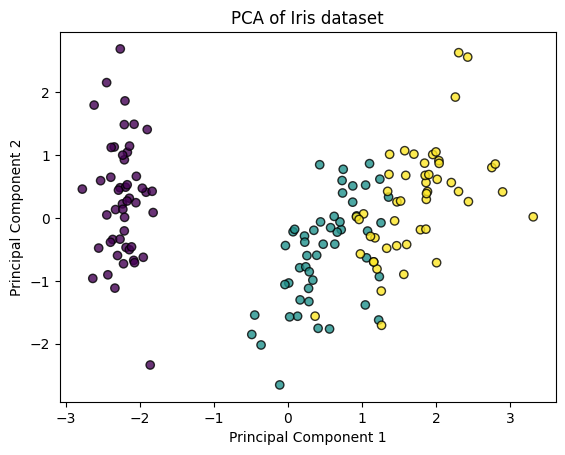

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Standardize the data (optional, but recommended for PCA)
mean = np.mean(X, axis=0)
std = np.std(X, axis=0)
X_standardized = (X - mean) / std

# Create a PCA object with the desired number of components
pca = PCA(n_components=2)

# Fit and transform the data using PCA
X_pca = pca.fit_transform(X_standardized)

# Visualize the results
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolors='k', alpha=0.8)
plt.title('PCA of Iris dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()
